# Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("https://www.dropbox.com/scl/fi/ioippropsqj7yyh24kmdg/Iowa_Liquor_Sales_Caseys.csv?rlkey=t5091uftolrhnpom6pv5lf1pr&dl=1")

# Data Exploration

In [ ]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'Iowa ZIP Code Tabulation Areas', 'Iowa Watershed Sub-Basins (HUC 08)',
       'Iowa Watersheds (HUC 10)', 'County Boundaries of Iowa', 'US Counties'],
      dtype='object')

In [ ]:
df_clean = df[["Date", "Store Number", "Store Location", "County", "Pack", "Bottle Volume (ml)", "State Bottle Cost", "State Bottle Retail", "Bottles Sold", "Sale (Dollars)"]]


<ipython-input-5-20eb3d8e516e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price Category'] = pd.cut(df_clean["State Bottle Retail"], bins=bin_edges, labels=bin_labels)


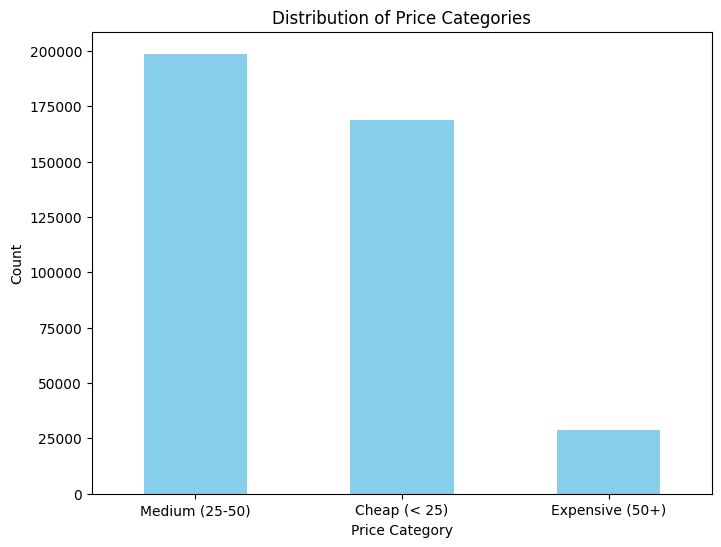

In [ ]:
bin_edges = [0, 10, 25, float('inf')]
bin_labels = ['Cheap (< 25)', 'Medium (25-50)', 'Expensive (50+)']

# Create the 'Price Category' column based on the bins and labels
df_clean['Price Category'] = pd.cut(df_clean["State Bottle Retail"], bins=bin_edges, labels=bin_labels)

# Value counts for the price categories
value_counts = df_clean['Price Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<ipython-input-6-32283109c0f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Bottle Size'] = pd.cut(df_clean['Bottle Volume (ml)'], bins=bin_edges, labels=bin_labels)


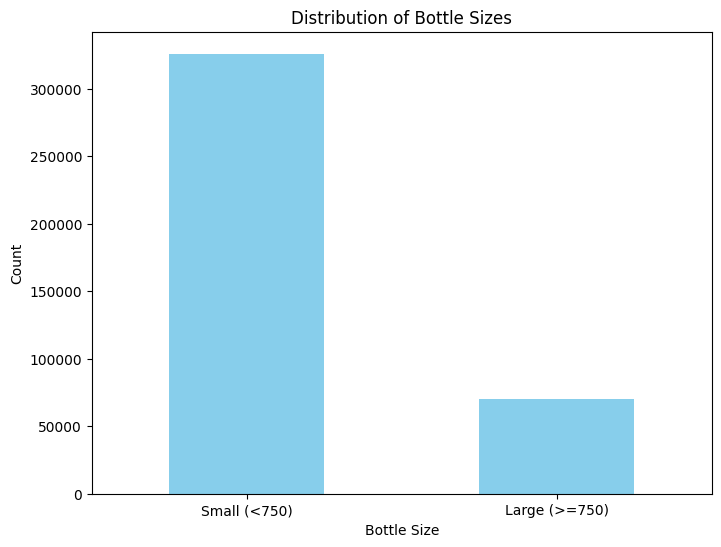

In [ ]:
bin_edges = [0, 750, float('inf')]
bin_labels = ['Small (<750)', 'Large (>=750)']

df_clean['Bottle Size'] = pd.cut(df_clean['Bottle Volume (ml)'], bins=bin_edges, labels=bin_labels)

value_counts = df_clean['Bottle Size'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bottle Sizes')
plt.xlabel('Bottle Size')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

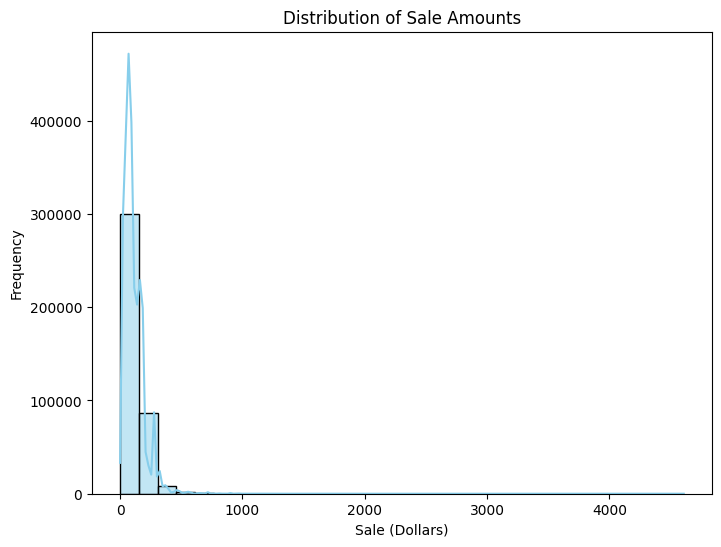

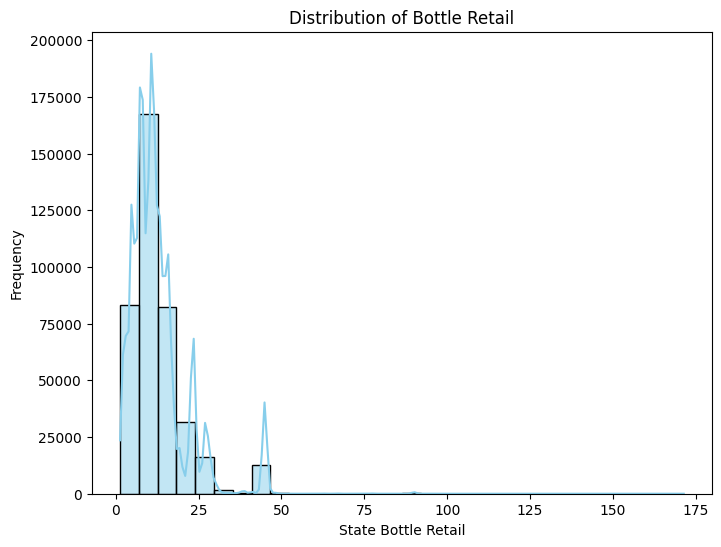

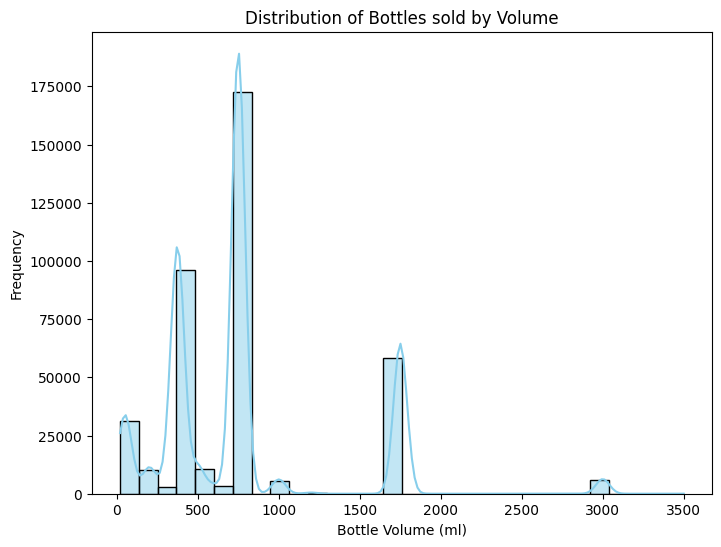

In [ ]:
# sale
plt.figure(figsize=(8, 6))
sns.histplot(df['Sale (Dollars)'], bins=30, kde=True, color='skyblue')
plt.xlabel('Sale (Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Amounts')
plt.show()

# state bottle retail
plt.figure(figsize=(8, 6))
sns.histplot(df['State Bottle Retail'], bins=30, kde=True, color='skyblue')
plt.xlabel('State Bottle Retail')
plt.ylabel('Frequency')
plt.title('Distribution of Bottle Retail')
plt.show()

# bottle size
plt.figure(figsize=(8, 6))
sns.histplot(df['Bottle Volume (ml)'], bins=30, kde=True, color='skyblue')
plt.xlabel('Bottle Volume (ml)')
plt.ylabel('Frequency')
plt.title("Distribution of Bottles sold by Volume")
plt.show()

# Feature Engineering

In [ ]:
caseys = df
caseys

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Iowa ZIP Code Tabulation Areas,Iowa Watershed Sub-Basins (HUC 08),Iowa Watersheds (HUC 10),County Boundaries of Iowa,US Counties
0,INV-02512900002,01/03/2017,4492,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,3625 EDGEWOOD RD SW,CEDAR RAPIDS,52404.0,POINT (-91.715911 41.94236600000001),57.0,LINN,...,12.00,24,288.00,9.00,2.38,793.0,18.0,263.0,45.0,287.0
1,INV-02512900012,01/03/2017,4492,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,3625 EDGEWOOD RD SW,CEDAR RAPIDS,52404.0,POINT (-91.715911 41.94236600000001),57.0,LINN,...,6.00,12,72.00,9.00,2.38,793.0,18.0,263.0,45.0,287.0
2,INV-02511700001,01/03/2017,4623,CASEY'S GENERAL STORE #1493 / VAN METER,700 DEBRA DR,VAN METER,50261.0,POINT (-93.951253 41.533177),25.0,DALLAS,...,23.39,6,135.66,4.50,1.19,760.0,27.0,333.0,62.0,1746.0
3,INV-02512900009,01/03/2017,4492,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,3625 EDGEWOOD RD SW,CEDAR RAPIDS,52404.0,POINT (-91.715911 41.94236600000001),57.0,LINN,...,2.70,24,64.80,9.00,2.38,793.0,18.0,263.0,45.0,287.0
4,INV-02503400014,01/03/2017,4487,CASEY'S GENERAL STORE #2787 / CEDAR RAPIDS,1661 32ND ST NE,CEDAR RAPIDS,52402.0,POINT (-91.662119 42.010447),57.0,LINN,...,7.13,12,85.56,4.50,1.19,196.0,18.0,264.0,45.0,287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396256,INV-33162600012,12/31/2020,4753,CASEY'S GENERAL STORE #2521 / ADAIR,110 S 5TH ST,ADAIR,50002.0,POINT (-93.300253 41.013948),1.0,ADAIR,...,8.25,6,49.50,2.25,0.59,446.0,29.0,354.0,87.0,288.0
396257,INV-33139900003,12/31/2020,5615,CASEY'S GENERAL STORE #2520 / GRIMES,206 E 1ST ST,GRIMES,50111.0,POINT (-93.79323800000002 41.688401000000006),77.0,POLK,...,14.13,2,28.26,1.50,0.39,654.0,25.0,315.0,64.0,1878.0
396258,INV-33164400010,12/31/2020,5177,CASEY'S GENERAL STORE #3204 / MINDEN,33280 335TH ST,MINDEN,51553.0,POINT (-95.546176 41.496153),78.0,POTTAWATTAMIE,...,7.85,12,94.20,9.00,2.37,840.0,42.0,250.0,69.0,1879.0
396259,INV-33164000073,12/31/2020,5342,CASEY'S GENERAL STORE # 3509/ CARTER LAKE,1650 E LOCUST ST,CARTER LAKE,51510.0,POINT (-95.910056 41.284953),78.0,POTTAWATTAMIE,...,23.36,4,93.44,3.00,0.79,781.0,40.0,437.0,69.0,1879.0


In [ ]:
def alc_type_cat(alc):
    alc_categories = {
        "VODKA": ["VODKA"],
        "WHISKY": ["WHISKY", "WHISKIES"],
        "RUM": ["RUM"],
        "GIN": ["GIN"],
        "TEQUILA": ["TEQUILA"],
        "BRANDY": ["BRANDIES", "BRANY"],
        "SCHNAPPS": ["SCHNAPPS"],
        "SPIRITS": ["SPIRITS"],
    }

    for category, keywords in alc_categories.items():
        for keyword in keywords:
          try:
            if keyword in alc:
                return category
          except:
            return "OTHER"
    return "OTHER"

In [ ]:
df_train = caseys.loc[:, ['Store Number', 'Date', 'County', 'Pack', 'Bottle Volume (ml)', 'State Bottle Retail', 'Bottles Sold', 'Category Name', 'Sale (Dollars)']]
df_train['Month'] = pd.to_datetime(df_train['Date']).dt.month
df_train['Year'] = pd.to_datetime(df_train['Date']).dt.year
df_train['Full Packs Sold'] = df_train['Bottles Sold'] // df_train['Pack']
df_train['Single Bottles Sold'] = df_train['Bottles Sold'] % df_train['Pack']
df_train['Bottle Size Category'] = pd.cut(x=df_train['Bottle Volume (ml)'],
                                          bins=[0, 750, np.infty],
                                          labels = ["SMALL", "LARGE"])
df_train['Bottle Price Category'] = pd.cut(x=df_train['State Bottle Retail'],
                                          bins=[0, 10, 25, np.infty],
                                          labels = ["CHEAP", "MIDPRICE", "EXPENSIVE"])
df_train['Alcohol Category'] = df_train['Category Name'].apply(alc_type_cat)
df_train.sort_values(['Store Number', 'Year', 'Month'], inplace=True)
df_train

,Store Number,Date,County,Pack,Bottle Volume (ml),State Bottle Retail,Bottles Sold,Category Name,Sale (Dollars),Month,Year,Full Packs Sold,Single Bottles Sold,Bottle Size Category,Bottle Price Category,Alcohol Category
415,4463,01/06/2017,HANCOCK,12,750,12.38,3,AMERICAN FLAVORED VODKA,37.14,1,2017,0,3,SMALL,MIDPRICE,VODKA
436,4463,01/06/2017,HANCOCK,6,1750,10.76,6,AMERICAN VODKAS,64.56,1,2017,1,0,LARGE,MIDPRICE,VODKA
489,4463,01/06/2017,HANCOCK,12,750,7.50,3,AMERICAN CORDIALS & LIQUEURS,21.39,1,2017,0,3,SMALL,CHEAP,OTHER
522,4463,01/06/2017,HANCOCK,6,1750,10.38,6,AMERICAN VODKAS,62.28,1,2017,1,0,LARGE,MIDPRICE,VODKA
529,4463,01/06/2017,HANCOCK,6,1750,10.80,6,AMERICAN VODKAS,64.80,1,2017,1,0,LARGE,MIDPRICE,VODKA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390466,6064,12/18/2020,POLK,12,50,10.95,12,STRAIGHT BOURBON WHISKIES,131.40,12,2020,1,0,SMALL,MIDPRICE,WHISKY
390474,6064,12/18/2020,POLK,12,50,13.31,12,CREAM LIQUEURS,159.72,12,2020,1,0,SMALL,MIDPRICE,OTHER
390493,6064,12/18/2020,POLK,12,375,8.25,6,MIXTO TEQUILA,49.50,12,2020,0,6,SMALL,CHEAP,TEQUILA
390494,6064,12/18/2020,POLK,5,50,44.30,5,IMPORTED CORDIALS & LIQUEURS,221.50,12,2020,1,0,SMALL,EXPENSIVE,OTHER


# Data Aggregation

In [ ]:
agg_1 = df_train[['Store Number', 'Year', 'Month', 'Bottle Size Category']].value_counts().sort_index().unstack().reset_index()
agg_2 = df_train[['Store Number', 'Year', 'Month', 'Bottle Price Category']].value_counts().sort_index().unstack().reset_index()
agg_3 = df_train[['Store Number', 'Year', 'Month', 'Alcohol Category']].value_counts().sort_index().unstack().reset_index()
agg_4 = df_train[['Store Number', 'Year', 'Month', 'Full Packs Sold', 'Single Bottles Sold', 'Sale (Dollars)']].groupby(['Store Number', 'Year', 'Month']).sum().reset_index()
df_agg = agg_4.merge(agg_1, how="left", on=['Store Number', 'Year', 'Month']) \
  .merge(agg_2, how="left", on=['Store Number', 'Year', 'Month']) \
  .merge(agg_3, how="left", on=['Store Number', 'Year', 'Month']) \
  .fillna(0)
df_agg.sort_values(['Store Number', 'Year', 'Month'])

,Store Number,Year,Month,Full Packs Sold,Single Bottles Sold,Sale (Dollars),SMALL,LARGE,CHEAP,MIDPRICE,EXPENSIVE,BRANDY,GIN,OTHER,RUM,SCHNAPPS,SPIRITS,TEQUILA,VODKA,WHISKY
0,4463,2017,1,88,110,10317.89,56.0,50.0,25.0,75.0,6.0,1.0,2.0,9.0,12.0,10.0,0.0,0.0,40.0,32.0
1,4463,2017,2,86,139,10824.47,64.0,56.0,26.0,86.0,8.0,3.0,1.0,12.0,17.0,8.0,0.0,1.0,40.0,38.0
2,4463,2017,3,101,161,12745.05,83.0,56.0,36.0,95.0,8.0,0.0,2.0,18.0,14.0,13.0,0.0,2.0,45.0,45.0
3,4463,2017,4,99,161,12401.86,86.0,46.0,40.0,83.0,9.0,4.0,2.0,10.0,18.0,14.0,0.0,6.0,37.0,41.0
4,4463,2017,5,114,158,14075.23,77.0,67.0,42.0,91.0,11.0,2.0,1.0,16.0,21.0,10.0,1.0,5.0,49.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,6059,2020,12,8,0,1225.80,4.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
13160,6063,2020,10,45,168,7489.36,63.0,6.0,26.0,39.0,4.0,1.0,2.0,12.0,10.0,2.0,1.0,5.0,16.0,20.0
13161,6063,2020,11,5,0,1018.68,4.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
13162,6063,2020,12,9,10,1592.96,9.0,1.0,4.0,6.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,3.0
